# **Lab 9**

## Data Visualization

In this lab, you will learn how to use the Matplotlib libary to visualize graphs and other kinds of figures. You will learn how Matplotlib forms the "backbone" of most other visualization libraries, and how we can have fine control over all components of a plot -- axes, labels, title, legends, etc. An extra section at the end exposes you to the Folium package which allows map based visualization and marking using Python.

### Matplotlib

[Matplotlib](https://matplotlib.org/) is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library include:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and dots-per-inch (DPI). 
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.
* GUI for interactively exploring figures and support for headless generation of figure files (useful for batch jobs).

One of the key features of matplotlib is that all aspects of the figure can be controlled *programmatically*. This is important for reproducibility and convenience when one needs to regenerate the figure with updated data or change its appearance. Also, such way of generating figures can provide automation for softwares and applications.

Although we have tried other visualization packages like Seaborn, but many of these packages still run matplotlib at the background, or rely on components from matplotlib.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# This line configures matplotlib to show figures embedded in the Jupyter notebook, 
# instead of opening a new window for each figure.
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Anatomy of a "Plot"

People use "plot" to mean many different things.  Here, we'll be using a consistent terminology as follows:

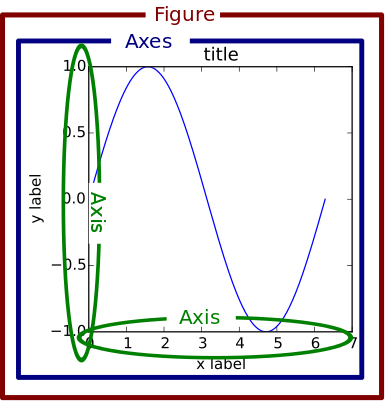

The ``Figure`` is the top-level container in this hierarchy.  It is the overall window/page that everything is drawn on.  You can have multiple independent figures and each ``Figure`` can contain multiple ``Axes``. 

Most plotting occurs on an ``Axes``. The axes is effectively the area that we plot data on and any ticks / labels / etc. associated with it.  Usually we'll set up an Axes with a call to ``Subplot`` (which places Axes on a regular grid), so in most cases, ``Axes`` and ``Subplot`` are synonymous. Each ``Axes`` has an ``XAxis`` and a ``YAxis``. These contain the ticks, tick locations, labels, etc. 

## MATLAB-like API

The easiest way to get started with plotting using matplotlib is often to use the MATLAB-like API. 

It is designed to be compatible with MATLAB's plotting functions, so it is easy to get started with if you are familiar with MATLAB. If not, it is still easy to grasp. 

In [2]:
# make some data
x = np.linspace(0, 20, 10)
y = x ** 2
print(x,y)

[ 0.          2.22222222  4.44444444  6.66666667  8.88888889 11.11111111
 13.33333333 15.55555556 17.77777778 20.        ] [  0.           4.9382716   19.75308642  44.44444444  79.01234568
 123.45679012 177.77777778 241.97530864 316.04938272 400.        ]


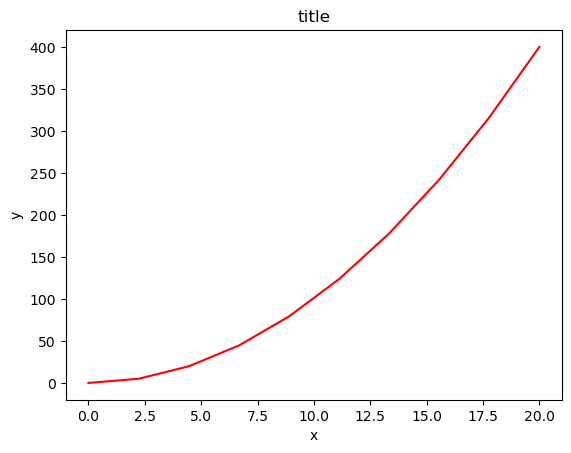

In [3]:
plt.figure()     # this creates the figure, but usually this is not necessary
plt.plot(x, y, 'r')     # line plotting
plt.xlabel('x')         # x-label text
plt.ylabel('y')         # y-label text
plt.title('title')      # title text
plt.show()              # display the figure

Creating subplots allow us to add a few plots into a single figure. This is particularly useful if a loop is needed to cycle through the data for plotting:

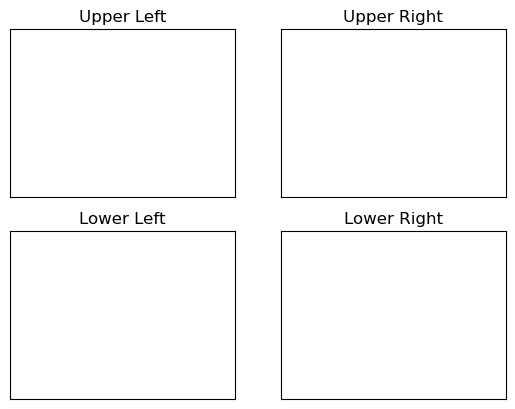

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2)  # creates a plot with 2x2 subplots
axes[0,0].set(title='Upper Left')   # set the title for axes at position (0,0)
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
# (uncomment the relevant rows below)
for ax in axes.flat:

    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])

The two coordinates in `axes` specify the row and column indices. For instance, `axes[0,1]` accesses the subplot axes at row 0 and column 1, which is the one at the upper right side.

Plots can also be customized to have different line colours and line patterns.

In this example, we have a look at another way how subplots can be accessed directly via the main `plt` object. To draw on different subplots, the `plot` function needs to be called for each subplot.

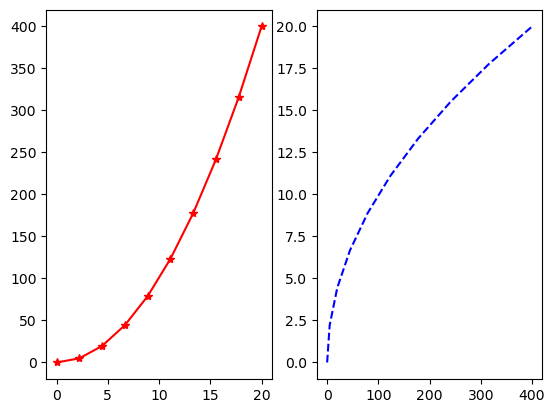

In [5]:
plt.subplot(1,2,1)
plt.plot(x, y, 'r*-')      # what do you think r* means?
plt.subplot(1,2,2)
plt.plot(y, x, 'b--');     # what about b-- ?

**Q1**: What do you think `r*-` or `b--` mean? It's related to the colour and line patterns.

<br>

The good thing about this MATLAB-style API is that it is easy to get started with if you are familiar with MATLAB, and it has minumum coding overhead for simple plots. 

However, the MATLAB-style API has limitations and it may be difficult to have advanced control over figures. It is recommended to learn and use matplotlib's *object-oriented* plotting API which is remarkably powerful. For advanced figures with subplots, insets and other components it is very nice to work with. 

## The Matplotlib object-oriented API

The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global (such as the MATLAB-like API). The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot. 

To use the object-oriented API we start out by storing a reference to the figure instance in the `fig` variable, instead of creating a new global figure instance. From it, we then create a new axis instance `axes` using the `add_axes` method of the instance `fig`:

<class 'matplotlib.figure.Figure'> <class 'matplotlib.axes._axes.Axes'>


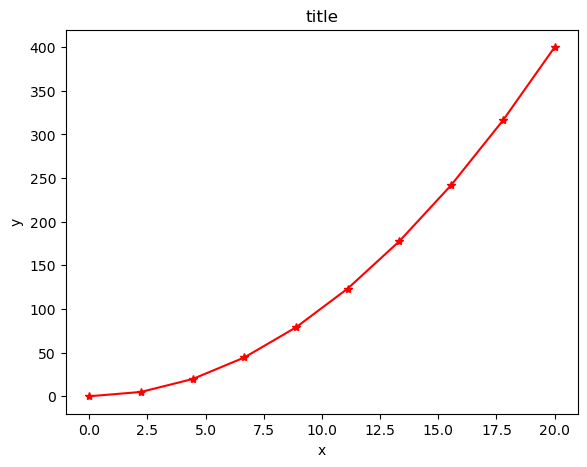

In [6]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
print(type(fig), type(axes))              # fig and axes are both different objects

axes.plot(x, y, 'r*-')     # the 3rd parameter: r means red, * means a star marker, - is a solid line

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

If we don't care about being explicit about where our plot axes are placed in the figure canvas, then we can use one of the many *axis layout managers* in matplotlib. A firm favorite is `subplots`, which can be used like this:

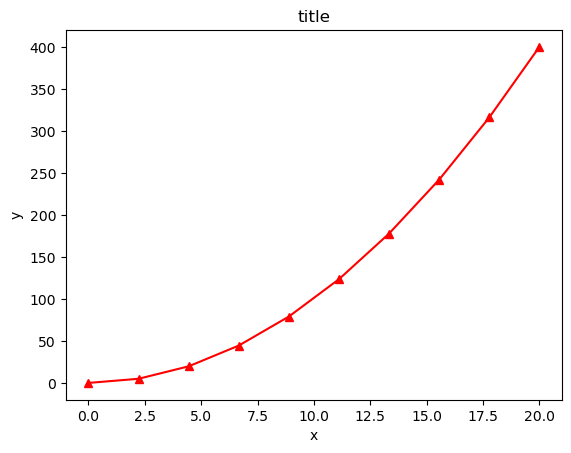

In [7]:
fig, axes = plt.subplots()    # by default 1 subplot

axes.plot(x, y, 'r^-')       # red, triangular marker, solid line
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

To create subplots, there are 2 useful parameters:

* `figsize` parameter takes a tuple of width and height values, in screen inches.
* `nrows` and `ncols` define the number of rows and columns of subplots (respectively) that you intend to create.

We can deal with that using the `fig.tight_layout` method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content caused by labels and axes:

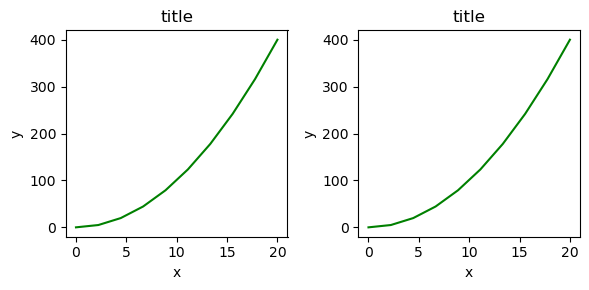

In [8]:
fig, axes = plt.subplots(figsize=(6,3), nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()

**Q2.** Create 5 subplots in a row. Each subplot contains a line of a function $y=x^n$ and that $n$ increases from 1 to 5.

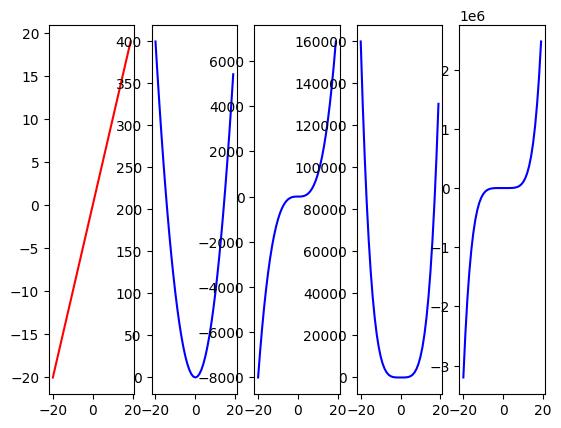

In [11]:


x = np.arange(-20,20,1)
plt.subplot(1,5,1)
plt.plot(x,x, 'r')

plt.subplot(1,5,2)
plt.plot(x,x**2,'b')

plt.subplot(1,5,3)
plt.plot(x,x**3,'b')


plt.subplot(1,5,4)
plt.plot(x,x**4,'b')

plt.subplot(1,5,5)
plt.plot(x,x**5,'b')


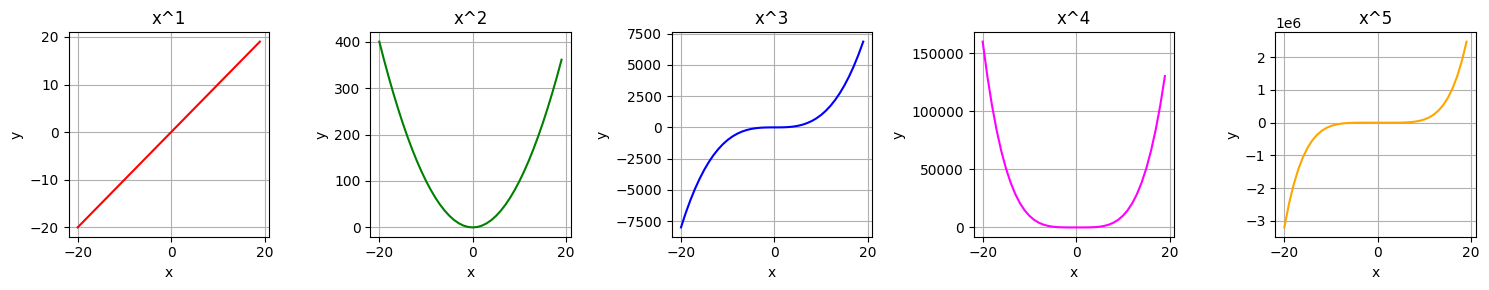

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-20, 20, 1)

# Define exponents and corresponding colors
exponents = [1, 2, 3, 4, 5]
colors = ['red', 'green', 'blue', 'magenta', 'orange']

plt.figure(figsize=(15, 3))

for i, (exp, color) in enumerate(zip(exponents, colors), 1):
    plt.subplot(1, 5, i)
    plt.plot(x, x**exp, color=color)
    plt.title(f'x^{exp}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)

plt.tight_layout()
plt.show()

### Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the `Figure` object is created, using the `figsize` and `dpi` keyword arguments. `figsize` controls the aspect ratio: width and height (in inches), and `dpi` is the dots-per-inch (pixel per inch) resolution. To create a 800x400 pixel, 100 dots-per-inch figure, we can do this: 

In [14]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

The same arguments can also be passed to layout managers, such as the `subplots` function.

### Saving figures

To save a figure as a file, we can use the `savefig` method of the `Figure` object:

In [15]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI and choose between different output formats:

In [16]:
fig.savefig("filename_dpi600.png", dpi=600)

Compare the two file sizes. The second file was saved at a higher quality level (600 dpi), hence a much larger file size.  

**What formats are available and which ones should be used for best quality?** Matplotlib can generate high-quality output in a number of formats, including PNG, JPG, EPS, SVG, PGF and PDF.

### Legends, labels and titles

Let's look at how to decorate a figure with titles, axis labels, and legends. These are also essential components of a figure.

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:
```python
ax.set_title("title");
```

**Axis labels**

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X and Y axes:
```python
ax.set_xlabel("x")
ax.set_ylabel("y")
```

**Legends**

Legends for curves in a figure can be added in two ways. One method is to use the `legend` method of the axis object and pass a list/tuple of legend texts for the previously defined curves:
```python
ax.legend(["curve1", "curve2", "curve3"])
```

A better method is to use the `label` keyword argument when plots or other objects are added to the figure, and then using the `legend` method without arguments to add the legend to the figure: 
```python
ax.plot(x, x**2, label="curve1")
ax.plot(x, x**3, label="curve2")
ax.legend();
```
This method is safer. The advantage of this method is that if curves are added or removed from the figure, the legend is automatically updated accordingly.

The `legend` function takes an optional keyword argument `loc` that can be used to specify where in the figure the legend is to be drawn. The allowed values of `loc` are numerical codes for the various places the legend can be drawn. See [here](http://matplotlib.org/users/legend_guide.html#legend-location) for details. Some of the most common `loc` values are:

```python
ax.legend(loc=0) # let matplotlib decide the optimal location
ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner
# .. many more options are available
```

Here's a sample snippet of code:

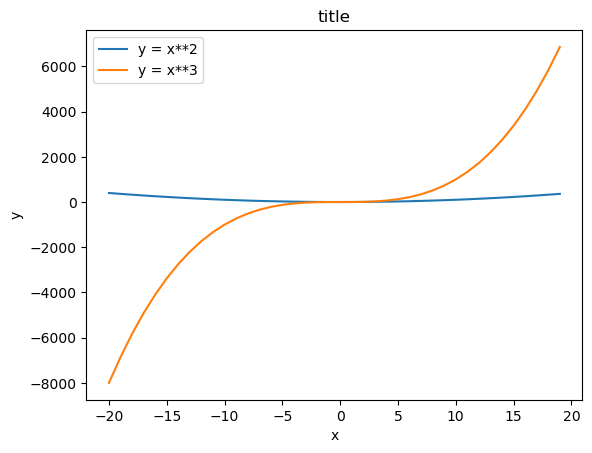

In [13]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');


Changing axes settings, legend settings, titles, labels have no effect until the `plot()` function is executed again.

### Formatting text: LaTeX, fontsize, font family

There are other decorative features. 

There are ways that we can add math (by [LaTeX formatted text](https://en.wikipedia.org/wiki/LaTeX)), and also adjust the font size or font type to an appropriate size that you wish.

To type in LaTeX, all we need to do is to use dollar symbols to encapsulate LaTeX code anywhere in text (legend, title, label, etc.). For example, `$y=x^3$` prints us $y=x^3$.

But here we can run into a slightly subtle problem with LaTeX code and Python text strings. In LaTeX, we frequently use the backslash in commands, for example `\alpha` to produce the symbol $\alpha$. But the backslash already has a meaning in Python strings (the escape code character). To avoid Python messing up LaTeX code, we need to use "raw" text strings. Raw text strings are prepended with an '`r`', like `r"\alpha"` or `r'\alpha'` instead of `"\alpha"` or `'\alpha'`:

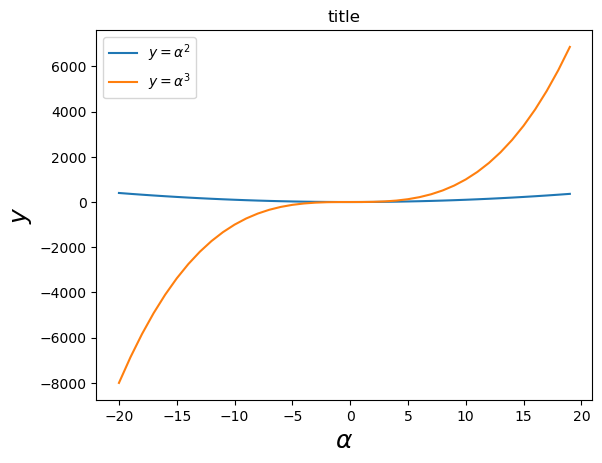

In [14]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title');

We can also change the global font size and font family, which applies to all text elements in a figure (tick labels, axis labels and titles, legends, etc.):

In [33]:
# Update the matplotlib configuration parameters (not the plot library):
import matplotlib
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

If you have math equations to show, a good choice of global fonts are the [STIX](https://www.stixfonts.org/) range of fonts, which can be set: 

In [16]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

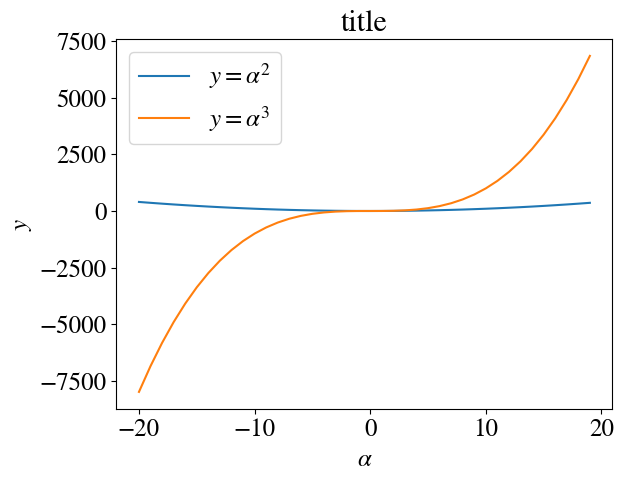

In [17]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('title');

### Colors

This is, perhaps, the most important piece of "vocabulary" in matplotlib. Given that matplotlib is a plotting library, colors are associated with everything that is plotted in your figures. Matplotlib supports a [very robust language](http://matplotlib.org/api/colors_api.html#module-matplotlib.colors) for specifying colors that should be familiar to a wide variety of users.

#### Colornames
First, colors can be given as strings. For very basic colors, you can even get away with just a single letter:

- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

Other colornames that are allowed are the HTML/CSS colornames such as "burlywood" and "chartreuse" are valid. See the [full list](https://www.w3schools.com/colors/colors_names.asp) of the 140 colornames. For those of us who may not be able to spell these names correctly, even "grey" is allowed eventhough "gray" appears in that list of colornames. All of these colornames are case-insensitive.


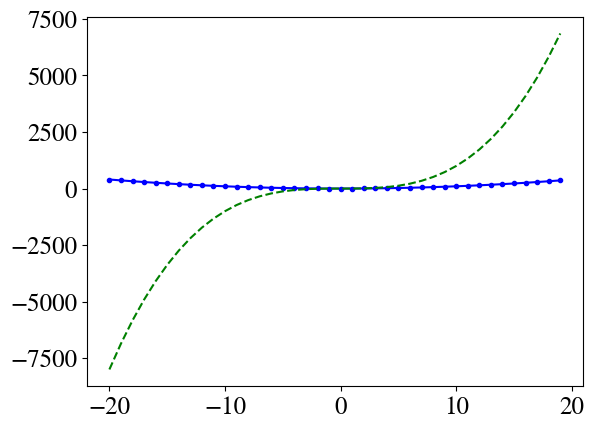

In [18]:
fig, ax = plt.subplots()

ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments:

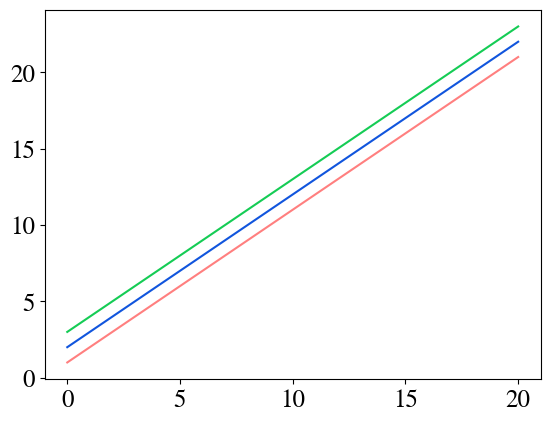

In [19]:
x = np.linspace(0, 20, 10)
y = x ** 2

fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color

### Line and marker styles

Line styles are about as commonly used as colors. There are a few predefined linestyles available to use. 

linestyle          | description
-------------------|------------------------------
'-'                | solid
'--'               | dashed
'-.'               | dashdot
':'                | dotted
'None'             | draw nothing
' '                | draw nothing
''                 | draw nothing

> Don't mix up ".-" (line with dot markers) and "-." (dash-dot line) when using the ``plot`` function!

Note that there are some advanced techniques to specify some custom line styles. [Here](http://matplotlib.org/1.3.0/examples/lines_bars_and_markers/line_demo_dash_control.html) is an example of a custom dash pattern.

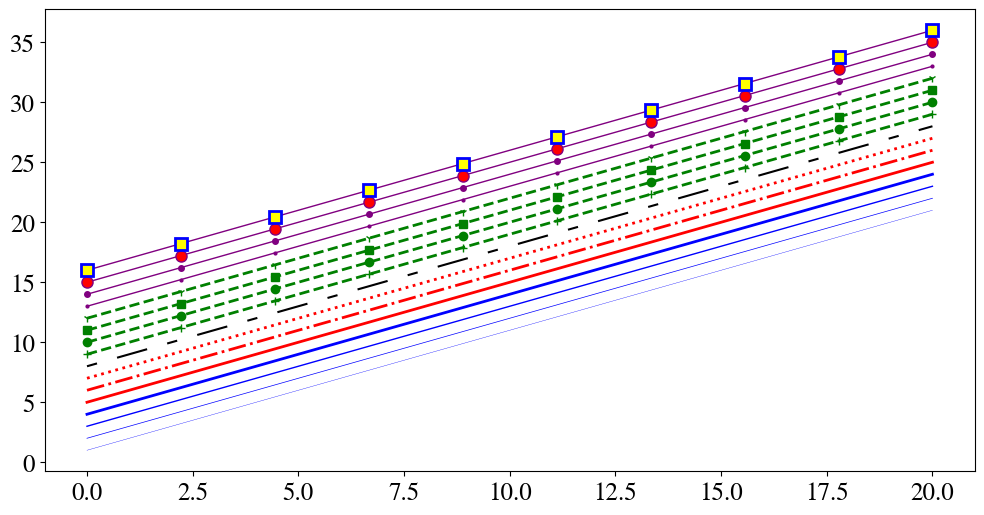

In [20]:
# Here's a huge collection of line plots of all kinds of styles!
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

### Markers
[Markers](http://matplotlib.org/api/markers_api.html) are commonly used in [`plot()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) and [`scatter()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) plots, but also show up elsewhere. There is a wide set of markers available, and custom markers can even be specified, but usually these are more than enough!

marker     |  description  ||marker    |  description  ||marker    |  description  ||marker    |  description  
:----------|:--------------||:---------|:--------------||:---------|:--------------||:---------|:--------------
"."        |  point        ||"+"       |  plus         ||","       |  pixel        ||"x"       |  cross
"o"        |  circle       ||"D"       |  diamond      ||"d"       |  thin_diamond ||          |
"8"        |  octagon      ||"s"       |  square       ||"p"       |  pentagon     ||"\*"      |  star
"&#124;"   |  vertical line||"\_"      | horizontal line ||"h"     |  hexagon1     ||"H"       |  hexagon2
0          |  tickleft     ||4         |  caretleft    ||"<"       | triangle_left ||"3"       |  tri_left
1          |  tickright    ||5         |  caretright   ||">"       | triangle_right||"4"       |  tri_right
2          |  tickup       ||6         |  caretup      ||"^"       | triangle_up   ||"2"       |  tri_up
3          |  tickdown     ||7         |  caretdown    ||"v"       | triangle_down ||"1"       |  tri_down
"None"     |  nothing      ||`None`    |  nothing      ||" "       |  nothing      ||""        |  nothing

## Control over axis appearance

The appearance of the axes is an important aspect of a figure that we often need to modify to create good quality figures. We need to be able to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes. In this section we will look at controling those properties in a matplotlib figure.

### Plot range

The first thing we might want to configure is the ranges of the axes. We can do this using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatically getting "tightly fitted" axes range:

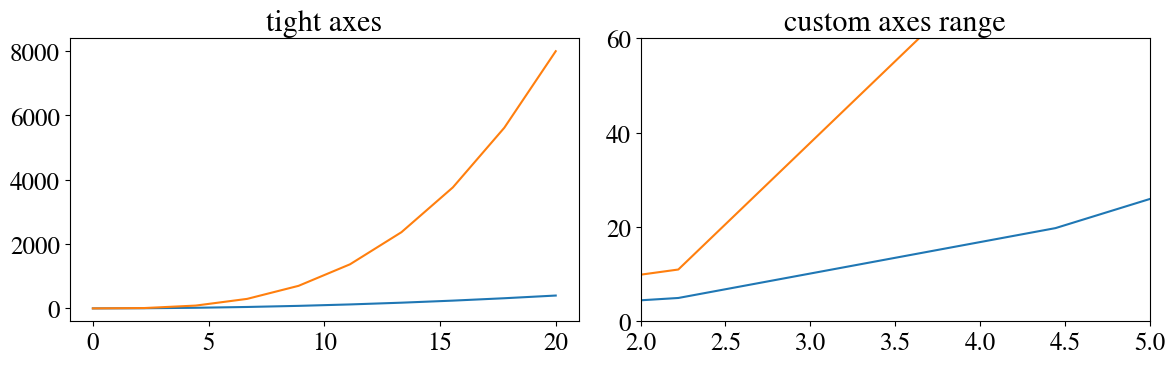

In [21]:
fig, axes = plt.subplots(1,2 , figsize=(12, 4))


axes[0].plot(x, x**2, x, x**3)
axes[0].axis('tight')
axes[0].set_title("tight axes")

axes[1].plot(x, x**2, x, x**3)
axes[1].set_ylim([0, 60])
axes[1].set_xlim([2, 5])
axes[1].set_title("custom axes range");

fig.tight_layout()

### Placement of ticks and custom tick labels

We can explicitly determine where we want the axis ticks with `set_xticks` and `set_yticks`, which both take a list of values for where on the axis the ticks are to be placed. We can also use the `set_xticklabels` and `set_yticklabels` methods to provide a list of custom text labels for each tick location:

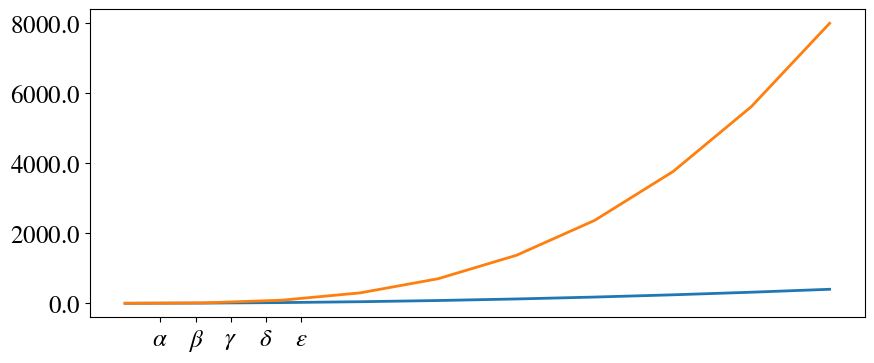

In [22]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 2000, 4000, 6000, 8000]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

### Axis grid

With the `grid` method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the `plot` function:

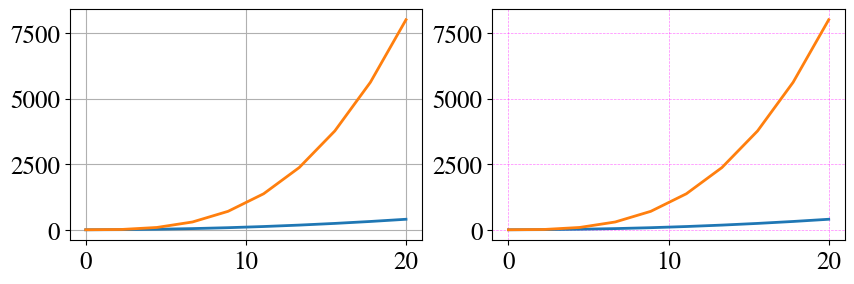

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)            # turn grid on

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='magenta', alpha=0.5, linestyle='dashed', linewidth=0.5)

### Axis spines

We can also change the properties of axis spines:

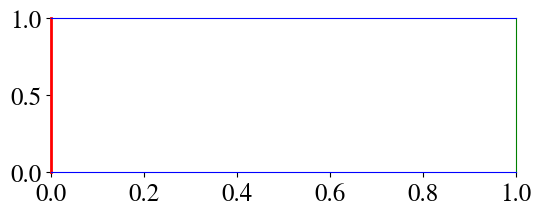

In [24]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("green")


### Twin axes

Sometimes it is useful to have dual *x* or *y* axes in a figure; e.g. when plotting curves with different units together. Matplotlib supports this with the `twinx` and `twiny` functions:

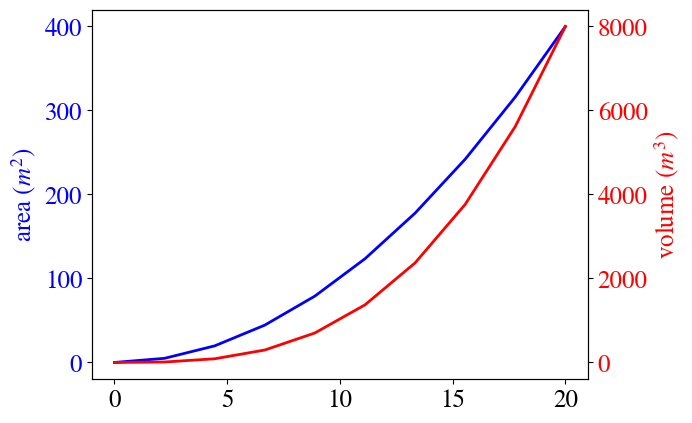

In [25]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Axes where x and y is zero

The x and y axes can both be set to zero, allowing the negative quadrants to show up.

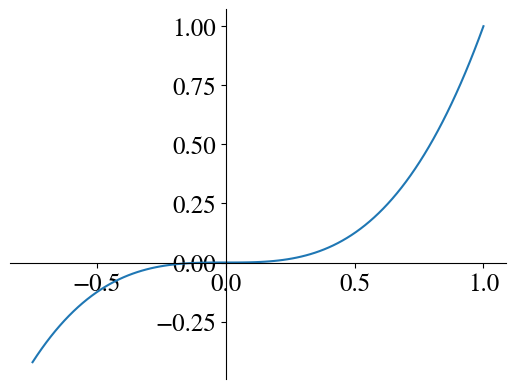

In [26]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

**Q3.** Given a simple dataset below:

Time (decade): 0, 1, 2, 3, 4, 5, 6.<br />
CO2 concentration (ppm): 250, 265, 272, 260, 300, 320, 389

a) Create a line graph of CO2 versus time. View the plot.

b) Re-draw the graph with a blue dashed line.

c) Add a title and axis titles to the plot.

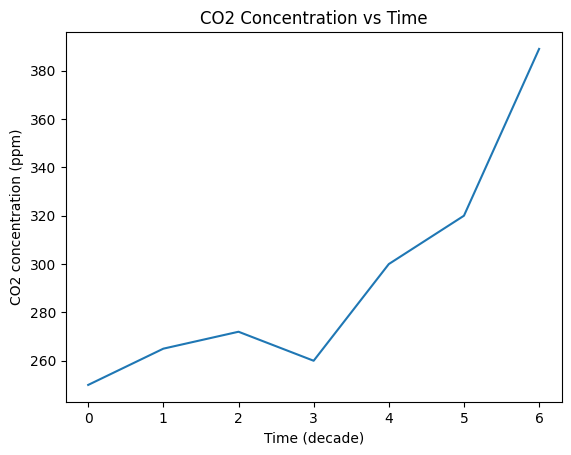

In [25]:
time = [0, 1, 2, 3, 4, 5, 6]
co2 = [250, 265, 272, 260, 300, 320, 389]
# Part (a)
plt.plot(time, co2)
plt.title('CO2 Concentration vs Time')
plt.xlabel('Time (decade)')
plt.ylabel('CO2 concentration (ppm)')
#plt.grid(True)
plt.show()
 


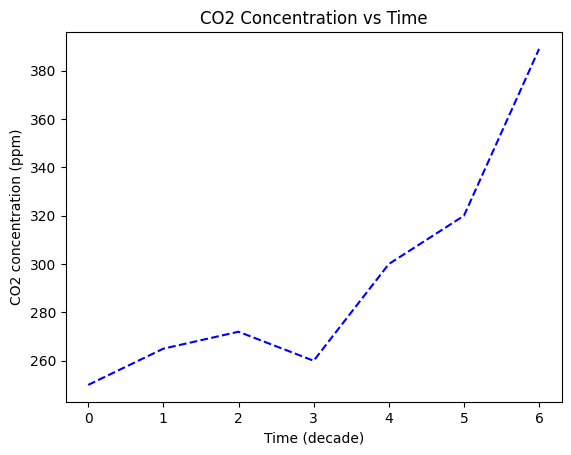

In [22]:
# Part (b) - Blue dashed line
plt.plot(time, co2, 'b--')  # 'b--' means blue dashed line
plt.title('CO2 Concentration vs Time')
plt.xlabel('Time (decade)')
plt.ylabel('CO2 concentration (ppm)')
#plt.grid(True)
plt.show()

**Q4.** Continuing with the same data plot above, re-plot again by adding a second line using the following data:

Temp (°c): 14.1, 15.5, 16.3, 18.1, 17.3, 19.1, 20.2

Then, save the output figure (using Python code) to a PDF file.

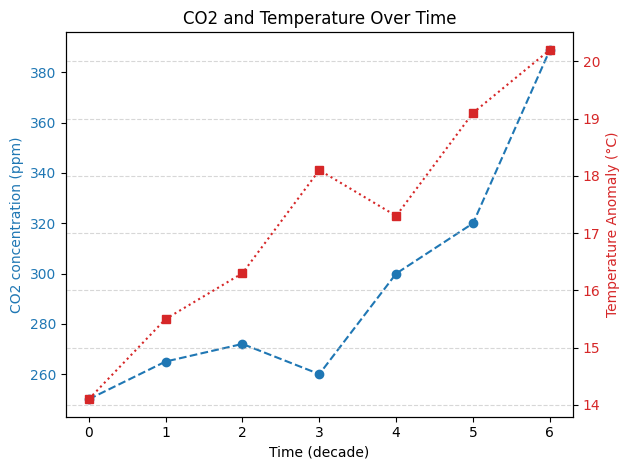

In [28]:
# write your codes here
# Simulated temperature anomaly (°C) - just for demonstration
temperature = [14.1, 15.5, 16.3, 18.1, 17.3, 19.1, 20.2]

# Create figure and primary axis
fig, ax1 = plt.subplots()

# Primary y-axis: CO2 (blue)
color = 'tab:blue'
ax1.set_xlabel('Time (decade)')
ax1.set_ylabel('CO2 concentration (ppm)', color=color)
ax1.plot(time, co2, color=color, marker='o', linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)

# Create twin axis (secondary y-axis): Temperature (red)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Temperature Anomaly (°C)', color=color)
ax2.plot(time, temperature, color=color, marker='s', linestyle=':')
ax2.tick_params(axis='y', labelcolor=color)

# Title and grid
plt.title('CO2 and Temperature Over Time')
fig.tight_layout()
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.5)

# Show plot
plt.show()

## Other 2D plot styles

In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are shown below:

In [29]:
n = np.array([0,1,2,3,4,5])

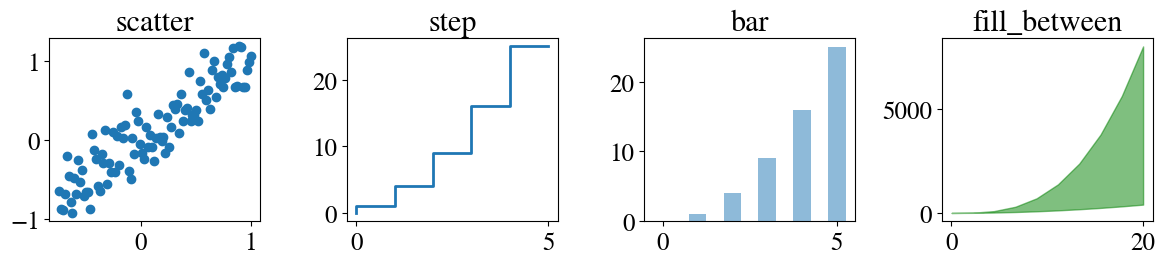

In [30]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

xx = np.linspace(-0.75, 1., 100)
axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

fig.tight_layout()

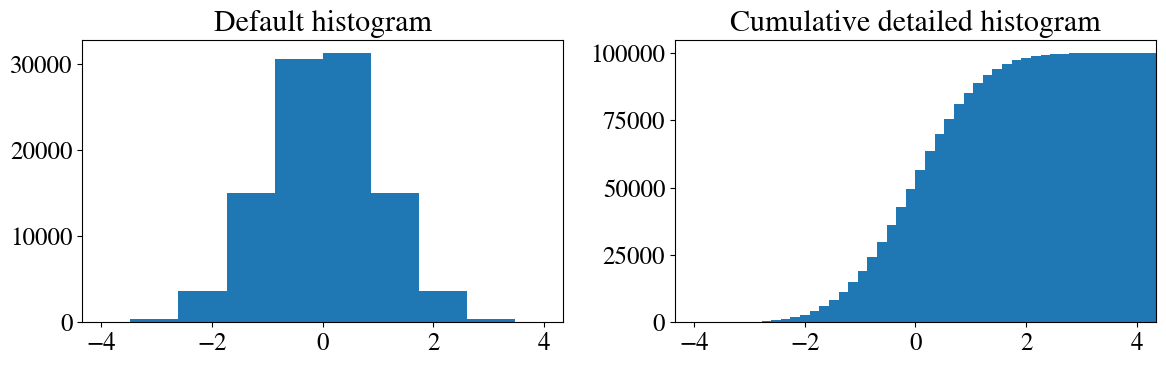

In [31]:
# Histograms
n = np.random.randn(100000)
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(n)
axes[0].set_title("Default histogram")
axes[0].set_xlim((min(n), max(n)))

axes[1].hist(n, cumulative=True, bins=50)
axes[1].set_title("Cumulative detailed histogram")
axes[1].set_xlim((min(n), max(n)));

fig.tight_layout()

## Text annotation

Annotating text in matplotlib figures can be done using the `text` function. It supports LaTeX formatting just like axis labels, texts and titles:

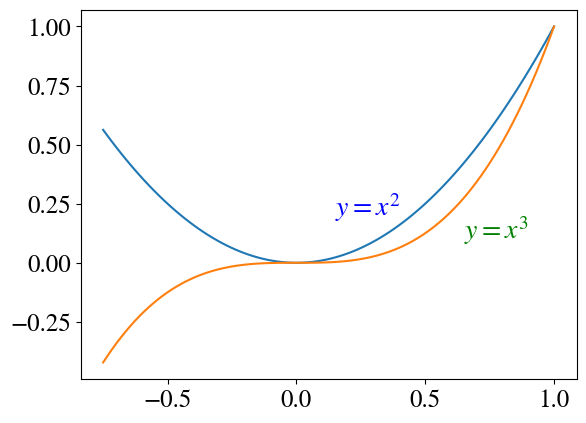

In [32]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

## Plotting with pandas plot functions

Pandas library has some basic plotting functions that can help us get the job done without the hassle of constructing plots with matplotlib (it actually relies on bindings with matplotlib). However, they are quite basic types and you may not be able to customize much.

Let's create some Malaysian states area data with additional state GDP stats.

In [34]:
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans-serif'})

states = ['Johor','Kedah','Kelantan','Melaka', 
          'Negeri Sembilan','Pahang','Perak','Perlis',
          'Penang','Sabah', 'Sarawak','Selangor','Terengganu']
area = [19210,9500,15099,1664,6686,36137,21035,
        821,1048,73631,124450,8104,13035]
gdp = [116.68, 40.60, 23.02, 37.27, 42.39, 52.45, 67.63, 5.64, 81.28, 80.17, 121.41, 280.70, 32.27]   # in million MYR
state_area = list(zip(states, area))

df = pd.DataFrame(data = state_area, columns=['State', 'Area'])

In [35]:
df

,State,Area
0,Johor,19210
1,Kedah,9500
2,Kelantan,15099
3,Melaka,1664
4,Negeri Sembilan,6686
5,Pahang,36137
6,Perak,21035
7,Perlis,821
8,Penang,1048
9,Sabah,73631


To plot bar charts, use `plot.bar()` which does the job with minimum fuss. However, you still need to format the ticks, labels and titles.

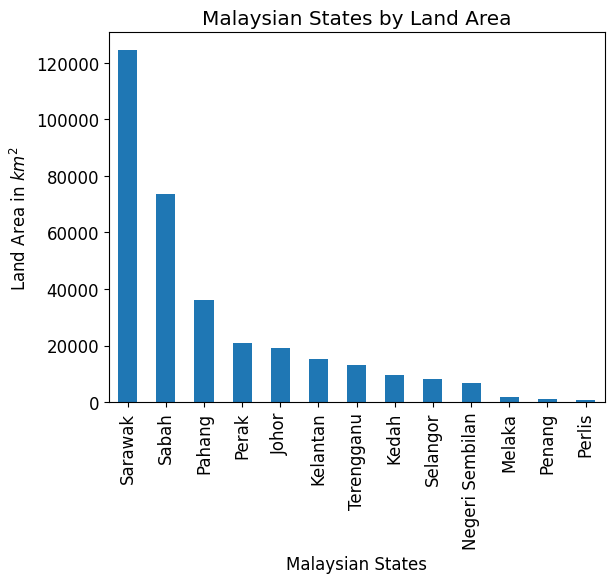

In [36]:
df = df.sort_values('Area',ascending=False)

df['Area'].plot.bar()                      # notice how pandas' plot somehow reverts to "seaborn" style plots?
plt.xticks(np.arange(13), (df['State']))   # the State column is used as labels
plt.xlabel('Malaysian States')
plt.ylabel('Land Area in $km^2$')
plt.title('Malaysian States by Land Area')
plt.show()

Alternatively, you can use a pie chart to show the same thing, although it is normally not that recommended from the data visualization point of view because it tends to give a misleading impression. It is difficult for us to compare the pie slices with our naked eye.

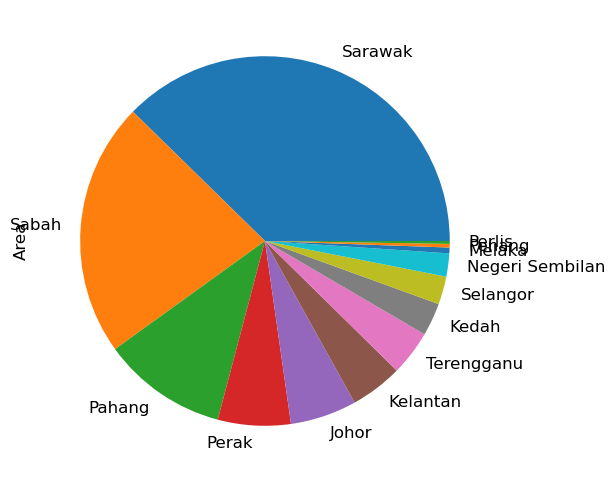

In [36]:
plt.figure(figsize=(6,6))
df['Area'].plot.pie(labels=df['State']) 
plt.show()

In [37]:
matplotlib.pyplot.pie?

Signature:
matplotlib.pyplot.pie(
    x,
    explode=None,
    labels=None,
    colors=None,
    autopct=None,
    pctdistance=0.6,
    shadow=False,
    labeldistance=1.1,
    startangle=0,
    radius=1,
    counterclock=True,
    wedgeprops=None,
    textprops=None,
    center=(0, 0),
    frame=False,
    rotatelabels=False,
    *,
    normalize=True,
    hatch=None,
    data=None,
)
Docstring:
Plot a pie chart.

Make a pie chart of array *x*.  The fractional area of each wedge is
given by ``x/sum(x)``.

The wedges are plotted counterclockwise, by default starting from the
x-axis.

Parameters
----------
x : 1D array-like
    The wedge sizes.

explode : array-like, default: None
    If not *None*, is a ``len(x)`` array which specifies the fraction
    of the radius with which to offset each wedge.

labels : list, default: None
    A sequence of strings providing the labels for each wedge

colors : array-like, default: None
    A sequence of colors through which the pie chart will cycl

In [38]:
list(map(list, zip(*[states, gdp, area])))

[['Johor', 116.68, 19210],
 ['Kedah', 40.6, 9500],
 ['Kelantan', 23.02, 15099],
 ['Melaka', 37.27, 1664],
 ['Negeri Sembilan', 42.39, 6686],
 ['Pahang', 52.45, 36137],
 ['Perak', 67.63, 21035],
 ['Perlis', 5.64, 821],
 ['Penang', 81.28, 1048],
 ['Sabah', 80.17, 73631],
 ['Sarawak', 121.41, 124450],
 ['Selangor', 280.7, 8104],
 ['Terengganu', 32.27, 13035]]

We can also plot scatter plots, which are commonly used to show the relationship between two attributes in data. In our example data, we have two attributes of the states: GDP and Area. If we want to find out how the states pull in their GDP with respect to their land sizes (assuming we think that larger states should have more resources and land to earn more), the scatter plot would be most useful. 

In [39]:
# prepare another dataframe containing all information
state_info = pd.DataFrame(list(map(list, zip(*[states, gdp, area]))), columns=['State', 'GDP', 'Area'])
state_info

,State,GDP,Area
0,Johor,116.68,19210
1,Kedah,40.60,9500
2,Kelantan,23.02,15099
3,Melaka,37.27,1664
4,Negeri Sembilan,42.39,6686
5,Pahang,52.45,36137
6,Perak,67.63,21035
7,Perlis,5.64,821
8,Penang,81.28,1048
9,Sabah,80.17,73631


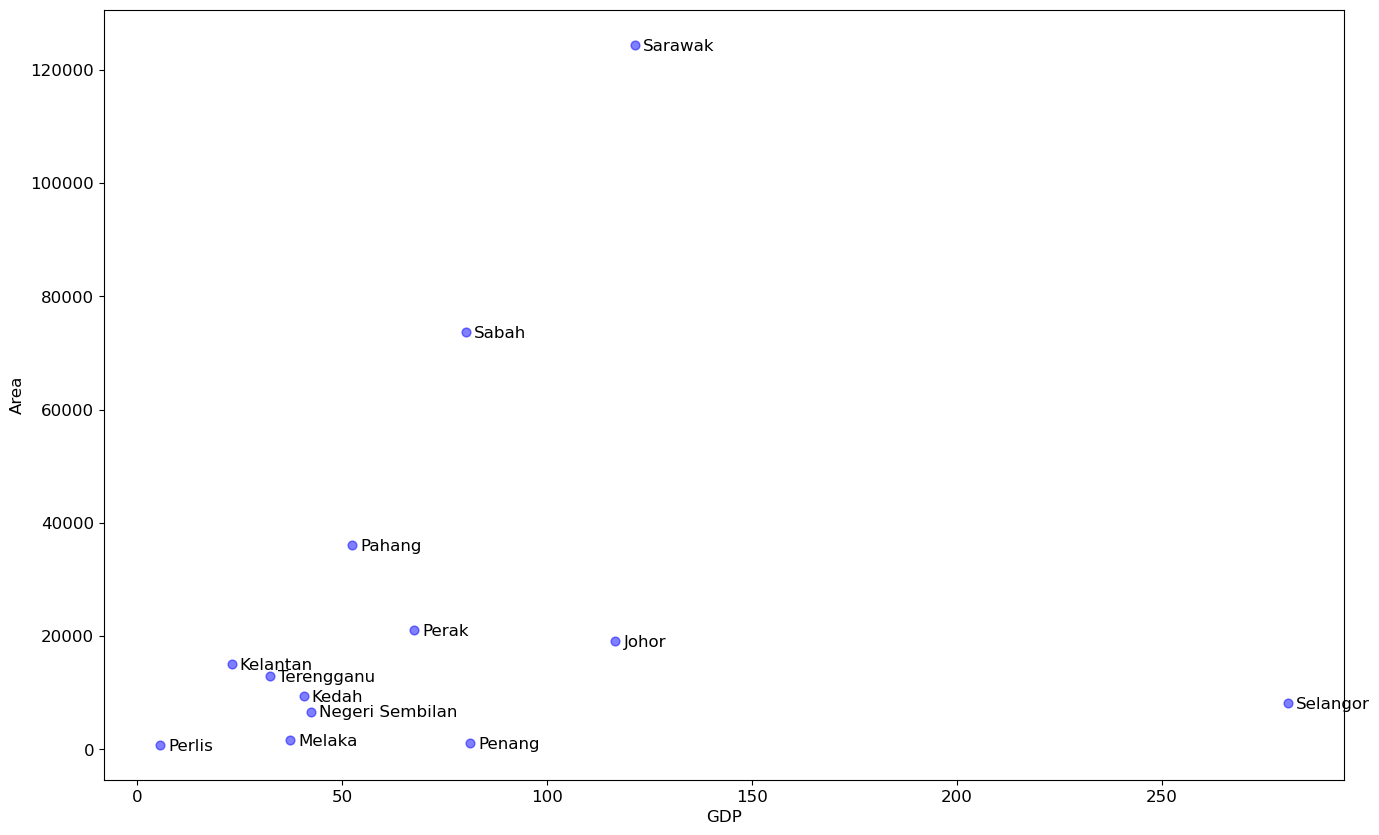

In [40]:
plt.rcParams["figure.figsize"] = [16,10]   # make the figure bigger
state_info.plot.scatter('GDP', 'Area', c='b', s=40, alpha=0.5, linewidth=1)

# provide some text annotations
offset = 2
for i, txt in enumerate(state_info['State']):
    plt.annotate(txt, (state_info['GDP'][i]+offset, state_info['Area'][i]-500*offset))

plt.show()

## Extra: Visualizing Location Data with **Folium**

Location data is difficult to "explore" by just looking at the latitude and longitude values (these values are similar to what is more popularly known as "GPS coordinates"). One possible way is to have them plotted over a map, and then you can visually inspect (in a way, exploring) in a qualitative manner. There are a number of Python libraries that can be used to plot on maps or create nice map visualizations -- Plotly (with Mapbox), Geopandas and Folium. Folium is pretty easy to pickup, with very few lines of code needed to mark locations on the map, and show the map. We just want something quick and fast, so that we can explore and have a look at the locations on map.

Check if the Folium package that comes installed in Colab is up to date. If you are using your own Jupter Notebook on your machine, most likely your environment does not have Folium by default. Go ahead and install it. 

In [37]:
%pip install --upgrade folium

  Using cached branca-0.8.1-py3-none-any.whl.metadata (1.5 kB)
  Using cached xyzservices-2025.4.0-py3-none-any.whl.metadata (4.3 kB)
Using cached branca-0.8.1-py3-none-any.whl (26 kB)
Using cached xyzservices-2025.4.0-py3-none-any.whl (90 kB)

   ------------- -------------------------- 1/3 [branca]
   ------------- -------------------------- 1/3 [branca]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   -------------------------- ------------- 2/3 [folium]
   ---------------------------------------- 3/3 [folium]

Note: you may need to restart the kernel to use updated packages.


In [38]:
import folium

To start, what is really needed to start is a pair of coordinates (latitude and longitude). Hence, let's sample a row from the stops data, and take its latitude and longitude data where the incident occurred.

In [39]:
import json
import pandas as pd

with open('stops.json') as f:
    stops_dict = json.load(f)

stops = pd.DataFrame(
    stops_dict['data'],
    columns=[c['name'] for c in stops_dict['meta']['view']['columns']])

In [40]:
stops

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,Incident Number,Call Date/Time,...,Location 1 (city),Location 1 (state),Location 1 (zip),Council Districts_uniq_prepend,Council Districts_from_hg3u_n7v4,Council Districts_from_c8zs_8y7x,Zip Codes,Police Beats,Census Tracts,Council Districts
0,row-xkgf-zr8a.6fpe,00000000-0000-0000-4A5A-0E740119A894,0,1556687429,None,1556687433,None,{ },2019-00004289,2019-01-25T14:51:35,...,None,None,None,None,None,None,None,None,None,None
1,row-6s6i~mhea-aiq2,00000000-0000-0000-2A6D-4576080468CA,0,1555712765,None,1555712773,None,{ },None,2017-08-07T07:18:25,...,None,None,None,None,None,None,None,None,None,None
2,row-zquh.a2sj_q4q3,00000000-0000-0000-97BB-D07AA3099E29,0,1556687429,None,1556687433,None,{ },2019-00016836,2019-03-29T21:37:10,...,None,None,None,None,None,None,None,None,None,None
3,row-q5v4.77ck_hv59,00000000-0000-0000-BD2C-2D6B160554E3,0,1556687429,None,1556687433,None,{ },2019-00014752,2019-03-19T19:00:51,...,None,None,None,None,None,None,None,None,None,None
4,row-3vse~wvru.ac54,00000000-0000-0000-E5B3-CFD85D4C4DD3,0,1556687429,None,1556687433,None,{ },2019-00011794,2019-03-05T16:24:38,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55078,row-sy64.ghqx_rmmr,00000000-0000-0000-EC97-D8A1B4A6965D,0,1555712765,None,1555712783,None,{ },2018-00070395,2018-12-21T17:02:17,...,None,None,None,None,None,None,None,None,None,None
55079,row-8n9r~8ugp_uw97,00000000-0000-0000-CB6B-89AD079A47A5,0,1555712765,None,1555712783,None,{ },2018-00049425,2018-09-01T17:31:45,...,None,None,None,None,None,None,None,None,None,None
55080,row-w54r-4ia6~egds,00000000-0000-0000-EF70-69613C269F63,0,1555712765,None,1555712783,None,{ },2018-00059477,2018-10-22T22:23:36,...,None,None,None,None,None,None,None,None,None,None
55081,row-qyyc.nssz_cbpa,00000000-0000-0000-EF5C-C0AABF3969DB,0,1555712765,None,1555712783,None,{ },2018-00069263,2018-12-15T12:15:58,...,None,None,None,None,None,None,None,None,None,None


In [41]:
latt = float(stops.loc[88, 'Location - Latitude'])   
longt = float(stops.loc[88, 'Location - Longitude'])
print(latt)
print(longt)

37.853976073
-122.248601464


Next, to initiate the map centered upon the `lat` and `long` values:

In [42]:
m = folium.Map(location=[latt, longt])

Next, we want to place a marker (typical Google Map style teardrop shaped marker) on the location of the incident...

In [43]:
tooltip = 'Click Me!'   # this creates a tooltip text when you hover over the marker

folium.Marker([latt, longt], popup='<i>Random Place</i>', tooltip=tooltip).add_to(m)

In [44]:
m

The code is quite easily extendible to place more markers onto the map. Simply get two lists containing the latitude and longitude values of each location you want to mark, and write a loop to mark them on a new map, or add them to the existing map. 

For more ideas and variations (different shapes and colors of markers), map sizes, etc., please refer to Folium's quickstart tutorial [here](https://python-visualization.github.io/folium/quickstart.html).

---